In [7]:
from datetime import datetime
#import matplotlib
#matplotlib.use("Agg")
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
import shap
import sys

from etl_tsc import load_data
from utility import parse_config

paths = "/proj/hajaalin/Projects/n_track_ML/scripts/tsc/paths.yml"
paths = parse_config(paths)
    
# add InceptionTime source to Python path
src_inceptiontime = paths["src"]["inceptiontime"]
sys.path.insert(1, src_inceptiontime)
from cv_inceptiontime import inceptiontime_cv_repeat

# read the data 
data_dir = paths["data"]["dir"]
raw_data_file = paths["data"]["raw_data_file"]
data = load_data(Path(data_dir) / raw_data_file)

# parameters
fset = "f_dxy_mindist_angle_area"
kernel_size = 20
epochs = 20
max_repeats = 100
job_name = "shap_inceptiontime"
job_id = "1"
now = datetime.now().strftime("%Y%m%d%H%M%S")

# output folders
output_shap = Path(paths["output"]["shap"]) / job_name / now
output_shap.mkdir(parents=True, exist_ok=True)
output_it = Path(paths["output"]["it"]) / job_id
output_it.mkdir(parents=True, exist_ok=True)
output_it = str(output_it) + "/"


model_eval = inceptiontime_cv_repeat(data, output_it, fset, kernel_size=kernel_size, epochs=epochs, repeats=max_repeats, job_id=job_id, return_model_eval=True)

model, feature_names, shap_values, X_test, pred, truth = model_eval




Index(['dxy', 'serum_conc_percent', 'file', 'min_dist_pxs', 'angle', 'dangle',
       'area_micron'],
      dtype='object')
Index(['dxy', 'min_dist_pxs', 'angle', 'dangle', 'area_micron'], dtype='object')
repeat: 1/100
0.5714285714285714
0.8767123287671232
0.9583333333333334
0.9864864864864865
sufficiently accurate model found


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


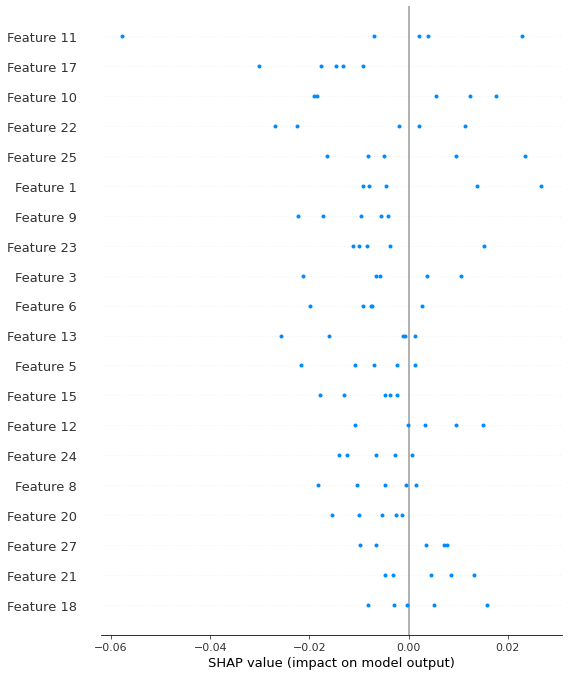

In [8]:
shap.summary_plot(shap_values[0][0])


In [9]:
print(X_test.shape)
print(X_test[0].shape)
print(X_test[0][0].shape)
print(feature_names[0])

(74, 5, 28)
(5, 28)
(28,)
dxy


In [10]:
print(len(shap_values)) # model outputs (number of classes)
print(shap_values[0].shape) # samples
print(shap_values[0][0].shape) # features
print(shap_values[0][0][0].shape) # time points


2
(74, 5, 28)
(5, 28)
(28,)


In [11]:
shap_values[0][0][0]

array([-0.00246967, -0.00920431, -0.01275537, -0.02136559,  0.00086681,
       -0.02174584, -0.00761879, -0.00179242, -0.00053487, -0.022265  ,
       -0.01908232,  0.00201067,  0.00958239, -0.00106921,  0.00129666,
       -0.01795763, -0.00876697, -0.01773399,  0.0052066 ,  0.00085277,
       -0.01009048,  0.00846507,  0.01146461, -0.00837412, -0.01248688,
        0.00961898,  0.00042788, -0.00971001])

In [19]:
shap_sample_sums = np.sum(shap_values[0], axis=(1,2))
print(shap_sample_sums.shape)
print(shap_sample_sums)


(74,)
[-0.53072513 -0.56246516  0.33024586  0.57662615  0.46877583 -0.49497847
 -0.51745543  0.46205191  0.41071531  0.464232    0.64087329  0.49883283
  0.73117615  0.53828261  0.51711264  0.70324673 -0.20554062 -0.43903464
 -0.37197001 -0.33607172  0.46403919 -0.487225   -0.2307703   0.8761502
  0.63818788 -0.74605835 -0.3622907  -0.4845893  -0.55242569 -0.18084905
 -0.41190097 -0.44088108 -0.47612973 -0.26394399 -0.54408115  0.69984983
  0.41682916 -0.46230334 -0.6624525   0.67506501  0.46773975 -0.38220175
 -0.3099961   0.54134011  0.55492264 -0.30049556 -0.31671122  0.41763031
  0.66185131 -0.44441351 -0.73247701  0.50796771  0.35774195 -0.07872099
  0.13369753 -0.4905422  -0.37844583  0.38249653 -0.33413196 -0.45844587
 -0.30448244 -0.49423431  0.57837701  0.52059559  0.43720785  0.72644948
 -0.53932671 -0.42877688  0.51246645  0.35791579  0.73083365  0.53779133
  0.42741956  0.52408693]


In [13]:
pred

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0])

In [14]:
truth

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0])

In [18]:
import numpy as np
mask0 = (truth==0) & (pred==0)
mask1 = (truth==1) & (pred==1)
mask0i = np.array(mask0).astype(int)
mask1i = np.array(mask1).astype(int)
print(mask0)
print(mask1)

[0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1]
[1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0]


In [20]:
# 0 seems to represent positive values, 1 negative values
# pick most positive and most negative samples
sample0 = np.argmax(shap_sample_sums * mask0)
sample1 = np.argmin(shap_sample_sums * mask1)

print(sample0)
print(sample1)
print(shap_sample_sums[sample0])
print(shap_sample_sums[sample1])
print(sum(sum(shap_values[0][sample0]))) 
print(sum(sum(shap_values[0][sample1]))) 


23
25
0.8761502001361805
-0.7460583502961526
0.8761502001361805
-0.7460583502961526


In [21]:
shap_sample_sums * mask0

array([-0.        , -0.        ,  0.33024586,  0.57662615,  0.46877583,
       -0.        , -0.        ,  0.46205191,  0.41071531,  0.464232  ,
        0.64087329,  0.49883283,  0.73117615,  0.53828261,  0.51711264,
        0.70324673, -0.        , -0.        , -0.        , -0.        ,
        0.46403919, -0.        , -0.        ,  0.8761502 ,  0.63818788,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.69984983,  0.41682916, -0.        , -0.        ,  0.67506501,
        0.46773975, -0.        , -0.        ,  0.54134011,  0.55492264,
       -0.        , -0.        ,  0.41763031,  0.66185131, -0.        ,
       -0.        ,  0.50796771,  0.35774195, -0.07872099,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.57837701,  0.52059559,  0.43720785,
        0.72644948, -0.        , -0.        ,  0.51246645,  0.35

In [22]:
sv = shap_values.copy()

In [23]:
print(shap_values[0].shape)
print(shap_values[0].size)
shap_array = shap_values[0].copy().reshape(shap_values[0].size, 1)
print(shap_array.shape)
print(shap_values[0].shape)

(74, 5, 28)
10360
(10360, 1)
(74, 5, 28)


In [24]:
np.percentile(shap_array, 10)

-0.014426644146442413

In [25]:
np.percentile(shap_array, 90)

0.015718351490795614

In [26]:
shap_values_feature_first = np.transpose(shap_values[0], axes=(1,0,2))
print(shap_values[0].shape)
print(shap_values_feature_first.shape)

(74, 5, 28)
(5, 74, 28)


(74, 28)
(2072, 1)
(74, 28)
(2072, 1)
(74, 28)
(2072, 1)
(74, 28)
(2072, 1)
(74, 28)
(2072, 1)


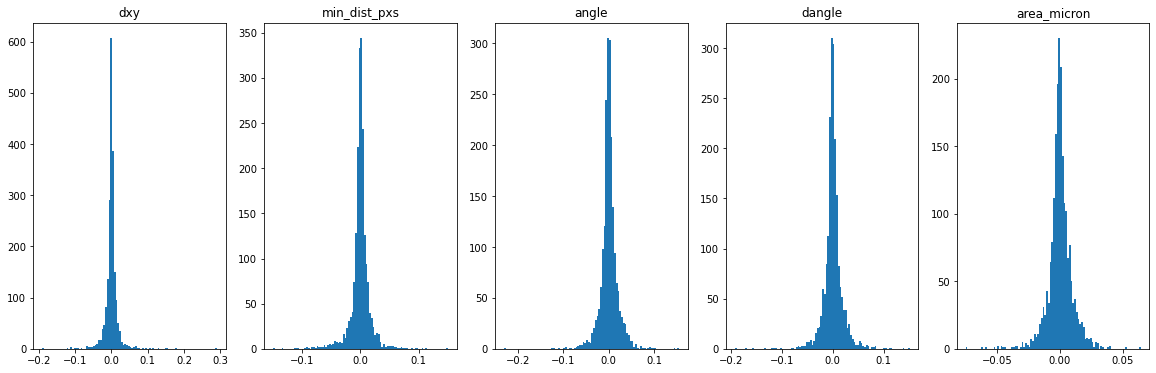

In [27]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,5)
fig.set_size_inches(20,6)
shap_arrays = []
vmin = []
vmax = []
for i in range(5):
    values = shap_values_feature_first[i].copy()
    print(values.shape)
    values = values.reshape(values.size, 1)
    print(values.shape)
    shap_arrays.append(values)
    axs[i].hist(values, bins=100)
    axs[i].set_title(feature_names[i])

shap_arrays_s = []
vmins = []
vmaxs = []
for i in range(shap_values[0].shape[0]):
    values = shap_values[0][i].copy()
    print(values.shape)
    values = values.reshape(values.size, 1)
    print(values.shape)
    shap_arrays_s.append(values)


In [31]:
vmin = []
vmax = []
for sa in shap_arrays:
    vmin.append(np.percentile(sa, 10))
    vmax.append(- np.percentile(sa, 10))
print(vmin)
print(vmax)

[-0.014589735958725212, -0.013998242001980537, -0.017952080257236956, -0.01713127139955759, -0.009924387000501154]
[0.014589735958725212, 0.013998242001980537, 0.017952080257236956, 0.01713127139955759, 0.009924387000501154]


(10360, 1)


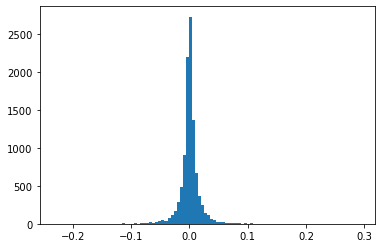

In [32]:
plt.hist(shap_array, bins=100)
print(shap_array.shape)

0
1
2
3
4
0
1
2
3
4


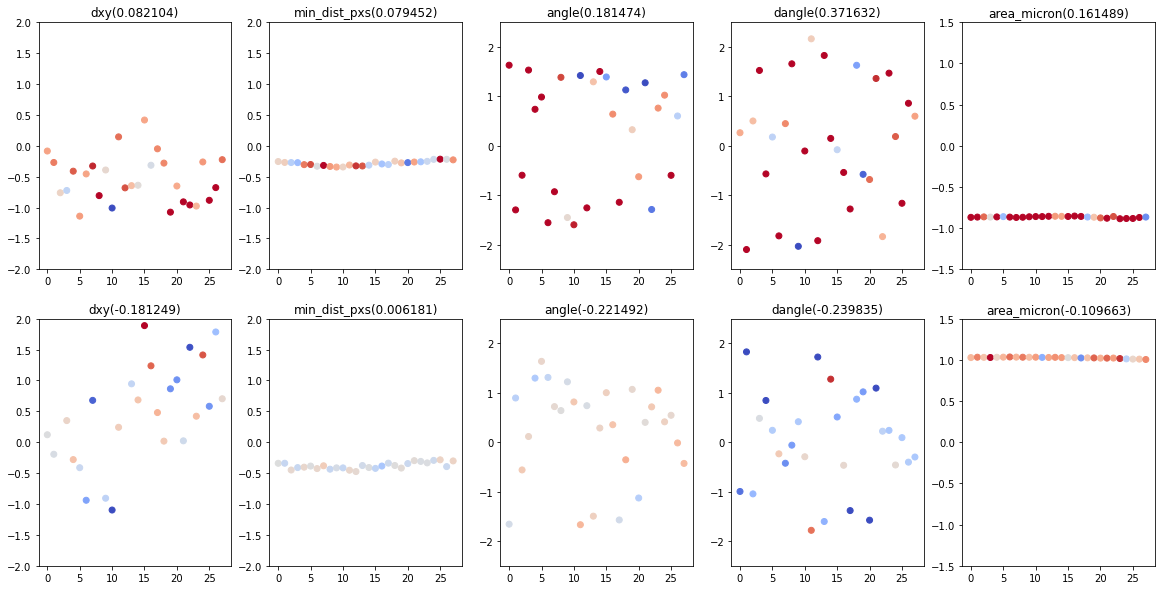

In [35]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2,5)
fig.set_size_inches(20,10)

model_output = 0
time_axis = list(range(shap_values[0].shape[2]))
ymin = [-2, -2, -2.5, -2.5, -1.5]
ymax = [2, 2, 2.5, 2.5, 1.5]

# adjust colormap min/max
#shap_min = -0.02
#shap_max = 0.02

samples = [sample0, sample1]
for s in range(len(samples)):
    for i in range(5):
        print(i)
        shap_values_for_feature = shap_values[model_output][samples[s]][i]
        
        # SHAP value limits by feature
        #vmin = vmin[i]
        #vmax = vmax[i]
        
        # SHAP value limits by sample
        vmin = np.percentile(shap_values[model_output][s][i], 10)
        vmax = np.percentile(shap_values[model_output][s][i], 90)
        
        axs[s][i].scatter(time_axis, X_test[samples[s]][i], c=shap_values_for_feature, cmap='coolwarm', vmin=vmin, vmax=vmax)
        shap_feature_sum = sum(shap_values_for_feature)
        axs[s][i].set_title(feature_names[i] + "(%f)" % shap_feature_sum)
        axs[s][i].set_ylim([ymin[i], ymax[i]])


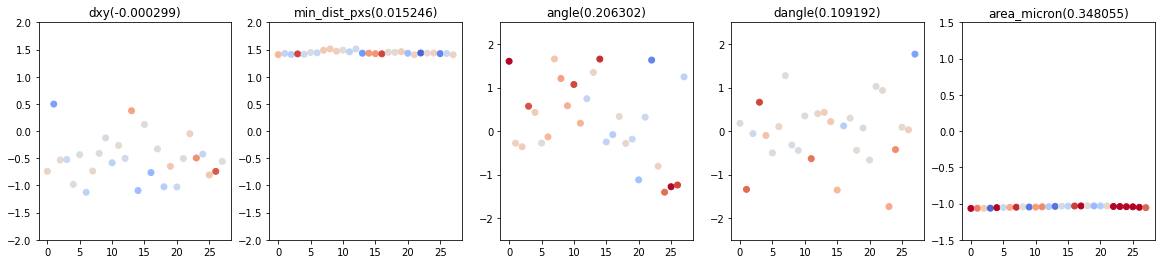

In [79]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,5)
fig.set_size_inches(20,4)

sample = 4
time_axis = list(range(28))
for i in range(5):
    shap_values_for_feature = shap_values[model_output][sample][i]
    axs[i].scatter(time_axis, X_test[sample][i], c=shap_values_for_feature, cmap='coolwarm', vmin=shap_min, vmax=shap_max)
    shap_feature_sum = sum(shap_values_for_feature)
    axs[i].set_title(feature_names[i] + "(%f)" % shap_feature_sum)
    axs[i].set_ylim([ymin[i], ymax[i]])


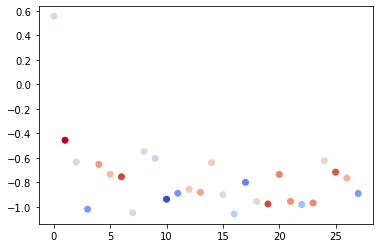

In [25]:
plt.scatter(list(range(28)), X_test[sample0][0], c=shap_values[0][sample0][0], cmap='coolwarm')


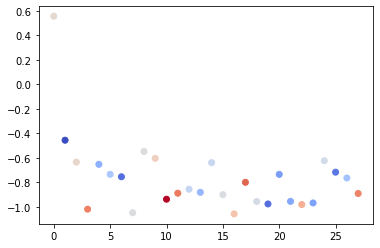

In [27]:
plt.scatter(list(range(28)), X_test[sample0][0], c=shap_values[1][sample0][0], cmap='coolwarm')
